In [1]:
import jieba
import multidict as multidict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Load user defined words
user_dict_path = "../userdict.txt"
jieba.load_userdict(user_dict_path)

Building prefix dict from the default dictionary ...
Loading model from cache D:\MyData\XUGP3\AppData\Local\Temp\jieba.cache
Loading model cost 1.270 seconds.
Prefix dict has been built succesfully.


In [3]:
def load_data(filepath):
    text = list()
    with open(filepath, 'r', encoding='utf-8') as fin:
        lines = fin.read().splitlines()
        for line in lines:
            text.extend(line.split('\t'))
    return text

In [4]:
def load_stopwords(filepath):
    with open(filepath, 'r', encoding='utf-8') as fin:
        lines = fin.read().splitlines()
        stopwords = [line.strip().lower() for line in lines]
        stopwords = set(stopwords)
    return stopwords

In [5]:
def get_frequency_dict(data, stopwords=[]):
    full_terms_dict = multidict.MultiDict()
    temp_dict = {}
    
    for text in data:
        text = text.strip().lower()
        words = list(jieba.cut(text))
        for word in words:
            if word not in stopwords:
                freq = temp_dict.get(word, 0)
                temp_dict[word] = freq + 1
                
    for key in temp_dict:
        full_terms_dict.add(key, temp_dict[key])
        
    return full_terms_dict

In [6]:
# 1. 载入数据
data_path = "../text.txt"
data = load_data(data_path)

In [7]:
# 2. 加载停用词
stopwords_path = "../stopwords.txt"
stopwords = load_stopwords(stopwords_path)

In [8]:
# 3. 计算词频
full_terms_dict = get_frequency_dict(data, stopwords=stopwords)

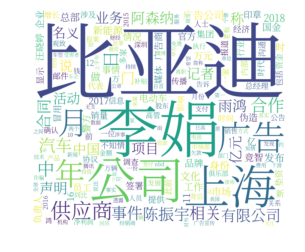

In [11]:
# 4. 绘图
font_path = "../SourceHanSerifK-Light.otf"
wc = WordCloud(font_path=font_path, width=1000, height=860, background_color='white', random_state=42)
wc.generate_from_frequencies(full_terms_dict)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud_path = "../wordcloud.png"
wc.to_file(wordcloud_path)